In [35]:
from salad.serialize import read
import numpy as np

In [19]:
detector = 1
snr = 5.0

images = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/images.pkl")
catalog = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/catalog.pkl")
search = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/search.pkl")

In [25]:
read("/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_5.0/unshuffled/refined_clusters_2_filtered_joined_split/0/cluster.pkl").extra['join']

i_x,i_y,ra,dec,expnum,time,peakValue,significance
float64,float64,float64,float64,float64,float64,float64,float64
163.0,2809.0,216.19189138530163,-11.002743309295953,845975.0,58577.393984940834,482.87158203125,309.4004821777344
165.0,2807.0,216.19218334528878,-11.002912064298085,845974.0,58577.39226360712,477.5310974121094,309.7838134765625
176.0,2818.0,216.19246938430845,-11.003112793424084,845973.0,58577.390541809145,427.37384033203125,299.43414306640625
172.0,2824.0,216.1927128238547,-11.003253763594476,845972.0,58577.388831184246,533.734130859375,318.8716735839844
176.0,2816.0,216.1930052891909,-11.003419652996946,845971.0,58577.387109267525,438.46514892578125,299.36322021484375
178.0,2823.0,216.19328123094144,-11.003548144501922,845970.0,58577.385399164166,653.1431274414062,337.6451721191406
187.0,2831.0,216.19351253945294,-11.00376495949218,845969.0,58577.38366577728,708.4180908203125,346.611083984375
185.0,2829.0,216.19380772000193,-11.00390004640939,845968.0,58577.38195688883,504.4386901855469,316.5804443359375
194.0,2838.0,216.19404887136682,-11.00408304889303,845967.0,58577.38024196215,660.9109497070312,346.3147277832031


In [ ]:
# 1) cluster
# 2) refine
# 3) refine
# 4) filter velocity
# 5) filter n detections
# 6) fit line on the cutouts
# 7) by-eye filter on coadd and light curves

# I should keep track of what clusters were lost at each stage

# A cluster is:
# - a set of points that support a line

# A line is: 
# - a predictor of ra/dec at a point in time


In [29]:
forced_line = read("/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_5.0/unshuffled/refined_clusters_2_filtered_joined_split/0/forced_line.pkl")


In [38]:
cutouts = np.array(forced_line.extra['cutouts'])[~ np.array(forced_line.extra['clipped'])]

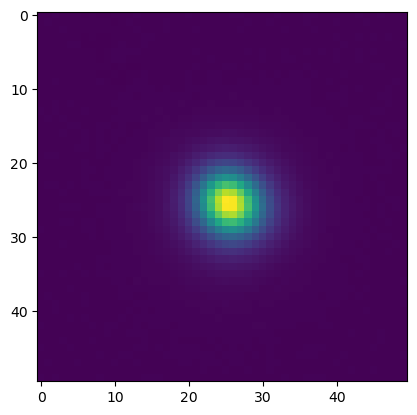

In [42]:
import matplotlib.pyplot as plt

plt.imshow(np.sum(list(map(lambda x : x.image.array, cutouts)), axis=0))
plt.show()

In [17]:
from salad.measure.forced_line import forced_line
from salad.cutouts.get import get_cutouts
from salad.cluster.join import join

In [23]:
cluster = search['filtered'][0]
cluster.extra['join'] = join(cluster, catalog)

In [ ]:
get_cutouts()